<font color="red"><h1><b><u>Make a COPY</u> of this notebook (by clicking File - Save copy in Drive) so your edits are saved</b></h1></font>

# 🏡 **House Price Prediction** with Linear Regression

Have you ever wondered how real estate websites estimate what a house is worth? Behind the scenes, they’re using machine learning models — just like the one we’ll build here.

In this project, we’ll train a Linear Regression model to predict house prices based on key features, including: <br> <br>

* 📏 Square Footage  

* 🛏 Number of Bedrooms

* 🛁 Number of Bathrooms

* 🏗 Year Built

* 🌳 Lot Size

* 🚗 Garage Size

* 🏘 Neighborhood Quality
 <br>

# 💡 **Real-world applications**:

Realtors can quickly estimate a fair price before listing a property.

Homebuyers can check if a house is overpriced compared to market value.

City planners and investors can forecast how new developments may affect housing markets.
 <br> <br>  


## Step 1: Get the Dataset

Before we start coding, we need to download the dataset we'll use for our house price predictions.  

- This command will download the file **`house_price_regression_dataset.csv`** onto your Colab environment.  
- You only need to run this **once** at the start of the notebook.  
- After running it, you should see the dataset file appear in your Colab file explorer (on the left side).  

In [ ]:
# @title **Run to fetch files**
!wget --no-check-certificate \
  'https://drive.google.com/uc?export=download&id=1YvnYEksm4gMMHE0xv68UneD5FemEXeAO' \
  -O house_price_regression_dataset.csv

--2025-09-08 12:09:27--  https://drive.google.com/uc?export=download&id=1YvnYEksm4gMMHE0xv68UneD5FemEXeAO
Resolving drive.google.com (drive.google.com)... 74.125.139.101, 74.125.139.138, 74.125.139.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.139.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1YvnYEksm4gMMHE0xv68UneD5FemEXeAO&export=download [following]
--2025-09-08 12:09:27--  https://drive.usercontent.google.com/download?id=1YvnYEksm4gMMHE0xv68UneD5FemEXeAO&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.134.132, 2607:f8b0:400c:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.134.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54781 (53K) [application/octet-stream]
Saving to: ‘house_price_regression_dataset.csv’

house_price_regress 100%[===================>] 

## Step 2: Import Libraries

We’ll import Python libraries for:
- Data handling (`pandas`, `numpy`)  
- Visualization (`matplotlib`)  
- Machine learning (`scikit-learn`)

In [ ]:
# Imports pandas for data handling
import pandas as pd

# Imports matplotlib for plotting
import matplotlib.pyplot as plt

# Imports train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

# Imports LinearRegression model
from sklearn.linear_model import LinearRegression

# Imports error metrics
from sklearn.metrics import mean_absolute_error, r2_score

# Imports functions that help with math and computing
import numpy as np


## Step 3: Explore the Dataset
Let's explore a CSV file with house features and prices.

In [ ]:
# Loads the dataset from a CSV file into a pandas DataFrame
# A DataFrame is like a table or spreadsheet in Python - it has columns and rows representing our data
# Pro tip: df means DataFrame
df = pd.read_csv("house_price_regression_dataset.csv")


# Prints the first couple of rows of the dataset to quickly inspect its contents
print("first 5 rows of dataset")
print(df.head())


# Prints a summary of the dataset, including column names, data types, and non-null counts
print("dataset info")
print(df.info())


first 5 rows of dataset
   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  
dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   

## Step 4: Define Features and Target (Our Inputs and Outputs)

- **Features (X):** All the input variables (e.g., square footage, bedrooms).  
- **Target (y):** The value we want to predict (house price).  

In [ ]:
from re import X
# X = all the input features (everything except the target column, OR THE COLUMN WITH WHAT WE WANT TO PREDICT)
# df.drop("House_Price", axis=1) means: remove the "House_Price" column from df
# axis=1 tells pandas we are dropping a column (axis=0 would mean dropping a row)
X = df.drop(columns=["House_Price"])



# y = the target/output we want to predict
# df["House_Price"] selects only the "House_Price" column from the DataFrame
y = df["House_Price"]



## Step 5: Split the Train-Test Data

We split the data into:
- **Training set (80%)** → used to train the model  
- **Testing set (20%)** → used to evaluate how well the model generalizes  

In [ ]:
# Splita the dataset into training and testing sets, so the model has something to learn from and then something to test its knowledge on
# X = input features, y = target values
# test_size=0.2 means 20% of the data will be used for testing, 80% for training
# random_state=42 ensures the split is the same every time we run the code. 42 CAN BE REPLACED WITH ANY NUMBER!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





## Step 6: Train the Linear Regression Model

We create a Linear Regression model and train it on the training data.  
This is where the model “learns” the relationships between features and prices.  

In [ ]:
#Create a Linear Regression model to be trained

model = LinearRegression()


# Train the model using the training data
# X_train = input features (like square footage, bedrooms, etc.)
# y_train = target values (actual house prices)
# The model learns the relationship between features and price

model.fit(X_train, y_train)

LinearRegression()

## Step 7: Make Predictions

We now use the trained model to predict house prices for the **test set**.  

In [ ]:
# Use the trained model to make predictions on the test set
# X_test = features of houses the model hasn't seen before
# y_pred = the predicted house prices for these test houses

y_pred = model.predict(X_test)

## Step 8: Evaluate the Model

We’ll evaluate performance using:
- **Mean Absolute Error (MAE):** average error size, in the same units as house price.  
- **R² Score:** how much of the variance in house prices our model explains (1 = perfect fit).  

In [ ]:
# Calculate how far off our predictions are on average
# MAE = Mean Absolute Error = average of all the errors
mae = mean_absolute_error(y_test, y_pred)

# Print the average error of our predictions
print("mean absolute error", mae)

# Calculate how well the model matches the data
# R² Score = 1 means perfect prediction, we want to be close to one!
r2 = r2_score(y_test, y_pred)

# Print how well our model fits the data
print("R2 score= ", r2)


mean absolute error 8174.583600008702
R2 score=  0.9984263636823408


## Step 9: Visualization

Let’s plot the **Actual vs Predicted house prices**.  
If predictions are perfect, points should lie along the red dashed line.  

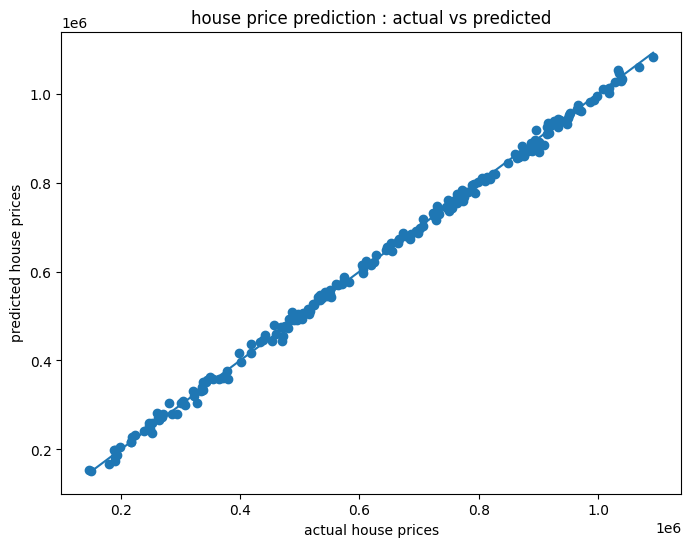

In [ ]:
# Create a figure for the plot and set its size (width=8, height=6 inches)

plt.figure(figsize= (8,6))
# Create a scatter plot of actual vs predicted house prices
# Each point represents one house
# y_test = actual prices, y_pred = predicted prices
plt.scatter(y_test, y_pred)

# Labels the x-axis

plt.xlabel("actual house prices")
# Labels the y-axis
plt.ylabel("predicted house prices")

# Sets the title of the plot
plt.title("house price prediction : actual vs predicted")

# Draws a red dashed line representing the predictions
# The [y_test.min(), y_test.max()] lists are x and y coordinates
# This line connects two points (the lowest prediction and the highest prediction) together, showing all of the predictions
# r-- makes the line dashed and red. It is for styling
plt.plot([y_test.min(), y_test.max()] , [y_test.min(), y_test.max()])

# Displays the plot

plt.show()

## Step 10: Predict New House Prices


Our model is ready. Let’s put it to the test. Instead of just looking at raw numbers, imagine this as a mini real-estate / finance tool.

Say a buyer is interested in a 2,000 sq ft home, with 3 bedrooms, 2 bathrooms, a 2-car garage, built in 2010, sitting on a 0.1 acre lot in a good neighborhood.

Let's see how expensive this house might be!

In [ ]:
def predict_house_price(Square_Footage, Num_Bedrooms, Num_Bathrooms, Year_Built, Lot_Size, Garage_Size, Neighborhood_Quality):
  data = np.array([[Square_Footage, Num_Bedrooms, Num_Bathrooms, Year_Built, Lot_Size, Garage_Size, Neighborhood_Quality ]])

  df_data = pd.DataFrame(data, columns=X.columns)

  return model.predict(df_data)[0]


Calling the function

In [ ]:
example_price = predict_house_price(2000, 3, 2, 2010, 0.1, 2, 7)
print("Predicted Price for Example house: $", round(example_price, 3))

Predicted Price for Example house: $ 445147.582
